In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
dataset = pd.read_csv("data.csv")
dataset.head()

,Dsu1,Dsu2,Dsu3,Dsu4,Dsu5,msu1,msu2,msu3,msu4,msu5,mu1d,mu2d,mu3d,mu4d,mu5d,output
0,0.29967,0.51043,0.502480,0.62400,0.44828,1,3,3,3,3,2,3,3,1,2,3
1,0.11994,0.59218,0.004863,0.87739,0.34508,2,3,2,3,1,2,3,2,3,3,2
2,0.90815,0.97858,0.823600,0.65289,0.54421,1,3,3,1,3,3,1,1,2,2,5
3,0.66691,0.97546,0.536040,0.69907,0.66329,3,2,2,3,2,3,2,1,1,3,1
4,0.71262,0.33222,0.802000,0.62010,0.42267,2,2,3,3,1,1,1,2,2,1,4


In [3]:
# checking for null values
print(dataset.isnull().sum())

Dsu1      0
Dsu2      0
Dsu3      0
Dsu4      0
Dsu5      0
msu1      0
msu2      0
msu3      0
msu4      0
msu5      0
mu1d      0
mu2d      0
mu3d      0
mu4d      0
mu5d      0
output    0
dtype: int64


In [4]:
# split the data into input and output columns
x = dataset.drop(['output'], axis =1)
print(x)

          Dsu1      Dsu2      Dsu3      Dsu4  ...  mu2d  mu3d  mu4d  mu5d
0     0.299670  0.510430  0.502480  0.624000  ...     3     3     1     2
1     0.119940  0.592180  0.004863  0.877390  ...     3     2     3     3
2     0.908150  0.978580  0.823600  0.652890  ...     1     1     2     2
3     0.666910  0.975460  0.536040  0.699070  ...     2     1     1     3
4     0.712620  0.332220  0.802000  0.620100  ...     1     2     2     1
...        ...       ...       ...       ...  ...   ...   ...   ...   ...
9995  0.311530  0.045383  0.350390  0.020064  ...     3     3     3     3
9996  0.489870  0.540190  0.083073  0.279790  ...     2     3     1     2
9997  0.178580  0.828720  0.092745  0.944910  ...     2     3     1     2
9998  0.007839  0.024577  0.738700  0.163540  ...     1     1     3     2
9999  0.237540  0.400920  0.011692  0.695920  ...     3     1     3     2

[10000 rows x 15 columns]


In [5]:
y = dataset['output']
print(y)

0       3
1       2
2       5
3       1
4       4
       ..
9995    3
9996    5
9997    5
9998    4
9999    4
Name: output, Length: 10000, dtype: int64


In [6]:
# summarize observations by class label
from collections import Counter
counter = Counter(y)
print(counter)

Counter({5: 2041, 1: 2012, 4: 2002, 2: 1985, 3: 1960})


In [7]:
# data standardization with sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.68680057  0.02890578  0.01471249 ...  1.2245611  -1.2235983
  -0.00184039]
 [-1.31317901  0.31163065 -1.7194965  ...  0.0075455   1.2334264
   1.22508629]
 [ 1.43381788  1.64795959  1.13382434 ... -1.20947011  0.00491405
  -0.00184039]
 ...
 [-1.10881229  1.12968253 -1.41322502 ...  1.2245611  -1.2235983
  -0.00184039]
 [-1.70386379 -1.65137223  0.83794555 ... -1.20947011  1.2334264
  -0.00184039]
 [-0.90333032 -0.34982451 -1.6956969  ... -1.20947011  1.2334264
  -0.00184039]]


In [8]:
# summarize first few examples
for i in range(10):
	print(x[i], y[i])

[-0.68680057  0.02890578  0.01471249  0.42817629 -0.17279072 -1.21920587
  1.24716831  1.22841937  1.21706512  1.22898907 -0.00195618  1.22272515
  1.2245611  -1.2235983  -0.00184039] 3
[-1.31317901e+00  3.11630651e-01 -1.71949650e+00  1.30796233e+00
 -5.32936073e-01  4.87877499e-04  1.24716831e+00 -1.84539715e-03
  1.21706512e+00 -1.22800627e+00 -1.95617523e-03  1.22272515e+00
  7.54549673e-03  1.23342640e+00  1.22508629e+00] 2
[ 1.43381788  1.64795959  1.13382434  0.52848419  0.16198393 -1.21920587
  1.24716831  1.22841937 -1.2263501   1.22898907  1.22065334 -1.23674413
 -1.20947011  0.00491405 -0.00184039] 5
[ 5.93070450e-01  1.63716935e+00  1.31669994e-01  6.88824055e-01
  5.77546993e-01  1.22018163e+00  1.85521047e-02 -1.84539715e-03
  1.21706512e+00  4.91399067e-04  1.22065334e+00 -7.00948746e-03
 -1.20947011e+00 -1.22359830e+00  1.22508629e+00] 1
[ 7.52374731e-01 -5.87417150e-01  1.05854775e+00  4.14635240e-01
 -2.62164001e-01  4.87877499e-04  1.85521047e-02  1.22841937e+00
  1.

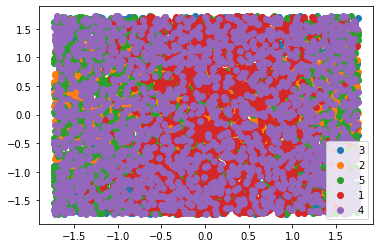

In [9]:
# plot the dataset and color them by class label
from numpy import where
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [10]:
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=0)

In [11]:
# define model
from xgboost import XGBClassifier
model = XGBClassifier()

In [12]:
# fit and evaluate the model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [13]:
x_test

array([[ 0.3379257 ,  0.44571314, -0.32058195, ..., -1.20947011,
         1.2334264 , -0.00184039],
       [ 1.68258488,  0.65843983,  0.74249066, ...,  1.2245611 ,
        -1.2235983 , -0.00184039],
       [ 0.61649037,  1.43042571,  0.26929371, ...,  0.0075455 ,
         1.2334264 , -0.00184039],
       ...,
       [ 1.39868799, -0.28127885, -1.7332288 , ...,  1.2245611 ,
        -1.2235983 ,  1.22508629],
       [-0.57492861,  1.61479345,  1.05349447, ...,  1.2245611 ,
         1.2334264 , -0.00184039],
       [ 1.37132989, -1.27249323, -0.34027235, ...,  0.0075455 ,
         1.2334264 , -1.22876707]])

In [14]:
y_test

9394    2
898     3
2398    3
5906    2
2343    1
       ..
1037    2
2899    3
9549    2
2740    4
6690    1
Name: output, Length: 2000, dtype: int64

In [15]:
y_pred

array([2, 3, 3, ..., 2, 4, 3])

In [16]:
score = model.score(x_test,y_test)
print('Accuracy:  %.4f' %score)

Accuracy:  0.9050


In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[371,  10,  10,   8,  14],
       [ 15, 380,   6,  13,  16],
       [  9,  11, 355,  11,  10],
       [ 11,   5,  14, 325,   3],
       [ 11,   3,   5,   5, 379]])

[Text(0, 0.5, 'Relay 1'),
 Text(0, 1.5, 'Relay 2'),
 Text(0, 2.5, 'Relay 3'),
 Text(0, 3.5, 'Relay 4'),
 Text(0, 4.5, 'Relay 5')]

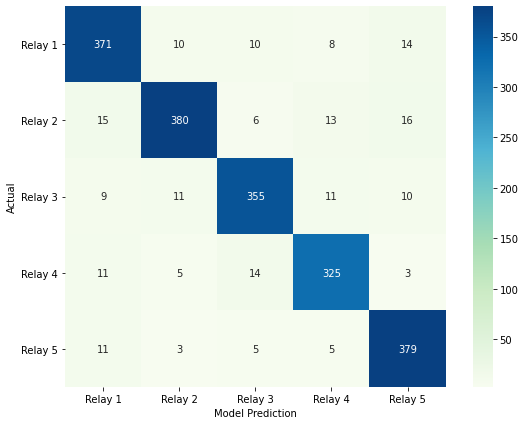

In [18]:
# visualize result using heatmap
import seaborn as sns
plt.figure(figsize =(10,7))
axes = sns.heatmap(cm,square=True,annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)
class_labels = ['Relay 1','Relay 2','Relay 3','Relay 4','Relay 5']
axes.set_xlabel('Model Prediction')
axes.set_ylabel('Actual')
tick_marks = np.arange(len(class_labels))+0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels,rotation=0)

In [19]:
# optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}
model = GridSearchCV(xgb_model, optimization_dict,scoring='accuracy',verbose=1)
model.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [20]:
print(model.best_score_)

0.9257


In [21]:
print(model.best_params_)

{'max_depth': 4, 'n_estimators': 200}


In [22]:
# KFold cross validation with hyperparameter optimization
from sklearn.model_selection import KFold
model = XGBClassifier(max_depth=4, n_estimators=200)
kfold_validation = KFold(10)

In [23]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model,x,y,cv=kfold_validation)
print(result)
print('Average accuracy: %.4f' %np.mean(result))

[0.936 0.919 0.931 0.918 0.927 0.936 0.938 0.937 0.915 0.926]
Average accuracy: 0.9283


In [24]:
# define the model with  hyperparameter optimization
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=4, n_estimators=200)

In [25]:
# fit and evaluate the updated model
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [26]:
# printing the results
score = model.score(x_test,y_test)
print('Accuracy of the optimized model:  %.4f' %score)

Accuracy of the optimized model:  0.9255


In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[378,   9,   7,   7,  12],
       [  6, 390,   7,  15,  12],
       [  6,   7, 365,   7,  11],
       [  4,   3,  12, 332,   7],
       [  7,   3,   4,   3, 386]])

[Text(0, 0.5, 'Relay 1'),
 Text(0, 1.5, 'Relay 2'),
 Text(0, 2.5, 'Relay 3'),
 Text(0, 3.5, 'Relay 4'),
 Text(0, 4.5, 'Relay 5')]

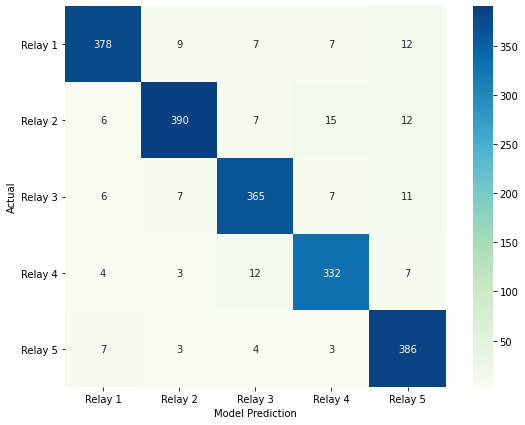

In [28]:
# visualize result using heatmap
import seaborn as sns
plt.figure(figsize =(10,7))
axes = sns.heatmap(cm,square=True,annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)
class_labels = ['Relay 1','Relay 2','Relay 3','Relay 4','Relay 5']
axes.set_xlabel('Model Prediction')
axes.set_ylabel('Actual')
tick_marks = np.arange(len(class_labels))+0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels,rotation=0)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Report: ')
print(classification_report(y_test,y_pred))

Accuracy Score:  0.9255
Report: 
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       413
           2       0.95      0.91      0.93       430
           3       0.92      0.92      0.92       396
           4       0.91      0.93      0.92       358
           5       0.90      0.96      0.93       403

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

